In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv', delimiter=',')
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


Кількість повторюваних значень у date_time

In [5]:
df['date_time'].duplicated().sum(), df.shape

(np.int64(7629), (48204, 9))

Дропнемо дублікати, залшивши останні значення

In [6]:
df = df.drop_duplicates(subset='date_time', keep='last', ignore_index = True)
df.shape

(40575, 9)

В holiday звичайні робочі дні (не свята) відповідають None. Замінимо None => work day

In [7]:
df.replace({'holiday': np.nan}, 'work day', inplace=True)
df['date_time'] = pd.to_datetime(df["date_time"], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       40575 non-null  int64         
 1   holiday              40575 non-null  object        
 2   temp                 40575 non-null  float64       
 3   rain_1h              40575 non-null  float64       
 4   snow_1h              40575 non-null  float64       
 5   clouds_all           40575 non-null  int64         
 6   weather_main         40575 non-null  object        
 7   weather_description  40575 non-null  object        
 8   date_time            40575 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 2.8+ MB


Ще з виводу методу .describe помітно аномальні значення в temp

<Axes: ylabel='temp'>

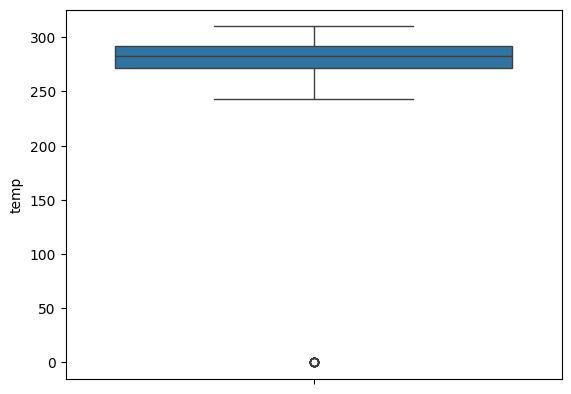

In [8]:
sns.boxplot(df['temp'])

<Axes: ylabel='temp'>

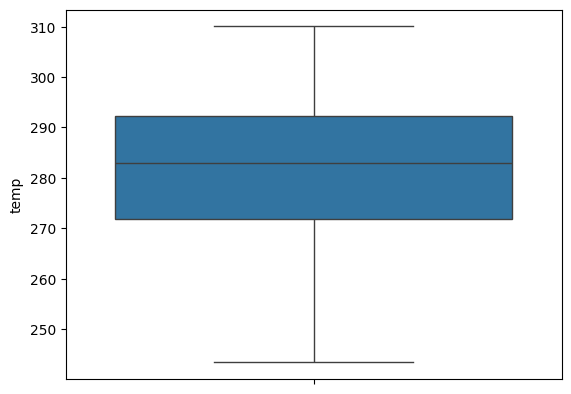

In [9]:
df.loc[df.temp == 0,'temp'] = 255.93
sns.boxplot(df['temp'])

Аномльне значення в rain_1h

<Axes: ylabel='rain_1h'>

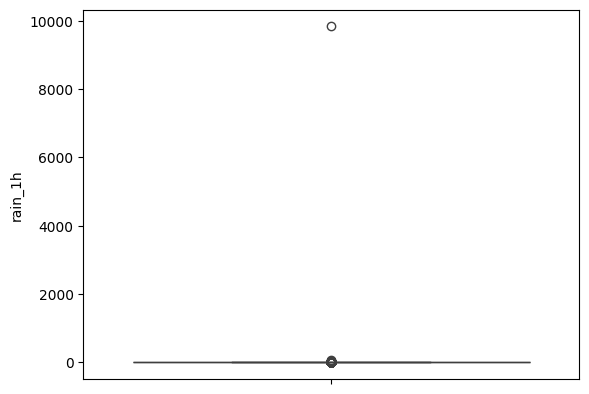

In [10]:
sns.boxplot(df['rain_1h'])

<Axes: ylabel='rain_1h'>

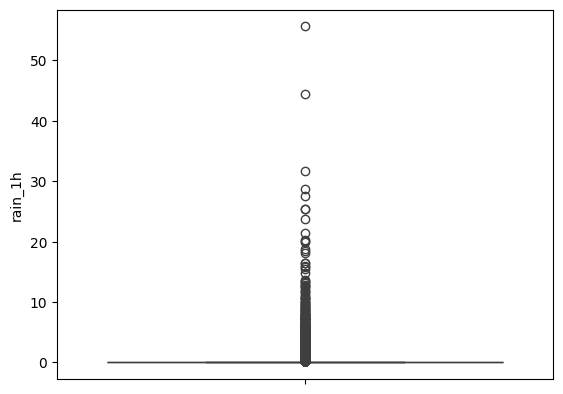

In [11]:
df.loc[df.rain_1h > 1000,'rain_1h'] = 0
sns.boxplot(df['rain_1h'])

In [12]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,date_time
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575
mean,3290.650474,281.378085,0.076319,0.000117,44.203253,2015-12-23 22:16:28.835489792
min,0.000000,243.390000,0.000000,0.000000,0.000000,2012-10-02 09:00:00
25%,1248.500000,271.840000,0.000000,0.000000,1.000000,2014-02-02 19:30:00
50%,3427.000000,282.860000,0.000000,0.000000,40.000000,2016-06-02 14:00:00
75%,4952.000000,292.280000,0.000000,0.000000,90.000000,2017-08-02 23:30:00
max,7280.000000,310.070000,55.630000,0.510000,100.000000,2018-09-30 23:00:00
std,1984.772909,13.099560,0.769576,0.005676,38.686321,NaN


Оскільки це погодинні спостереження, які проводилися протягом 6 років (2012-2018), то кількість годин кожного свята повинна відповідати 24*6 (кількість годин в добі помножено на кількість років, рахуємо, що свята відбуваються раз на рік і тривають лише один день)

In [13]:
df.holiday.value_counts()

,count
holiday,
work day,40522
Columbus Day,5
Veterans Day,5
Thanksgiving Day,5
Christmas Day,5
New Years Day,5
Washingtons Birthday,5
Memorial Day,5
Independence Day,5


З результату виводу наступної клітинки, помітно, що святу Columbus Day відповідає лише одна година на день замість 24

In [14]:
df[df.holiday == 'Columbus Day']

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
126,455,Columbus Day,273.080,0.0,0.0,20,Clouds,few clouds,2012-10-08
7966,615,Columbus Day,277.720,0.0,0.0,0,Clear,Sky is Clear,2013-10-14
16395,494,Columbus Day,293.020,0.0,0.0,1,Clear,sky is clear,2015-10-12
23372,484,Columbus Day,282.341,0.0,0.0,0,Clear,Sky is Clear,2016-10-10
32034,549,Columbus Day,284.620,0.0,0.0,1,Clear,sky is clear,2017-10-09


In [15]:
for holiday in df.holiday.unique()[1:]:
  df.loc[df.date_time.dt.date.isin(df[df['holiday'] == holiday].date_time.dt.date), 'holiday'] = holiday

Схоже, що деякі дні не містять всі 24 години спостережень

In [16]:
df.holiday.value_counts()

,count
holiday,
work day,39372
Independence Day,120
State Fair,119
Labor Day,118
Memorial Day,117
Washingtons Birthday,115
Christmas Day,113
New Years Day,112
Veterans Day,108


In [17]:
date_range = list(pd.date_range('2012-10-02 09:00:00', '2018-09-30 23:00:00', freq='H'))
print(len(date_range))
new_df = pd.DataFrame(date_range, columns=['date_time'])
full_df = pd.merge(new_df, df, how='left', on='date_time')
full_df.info()

52551
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52551 entries, 0 to 52550
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            52551 non-null  datetime64[ns]
 1   traffic_volume       40575 non-null  float64       
 2   holiday              40575 non-null  object        
 3   temp                 40575 non-null  float64       
 4   rain_1h              40575 non-null  float64       
 5   snow_1h              40575 non-null  float64       
 6   clouds_all           40575 non-null  float64       
 7   weather_main         40575 non-null  object        
 8   weather_description  40575 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 3.6+ MB


/tmp/ipython-input-3327011729.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = list(pd.date_range('2012-10-02 09:00:00', '2018-09-30 23:00:00', freq='H'))


У наборі пропущено приблизно рік спостережень плюс, як видно з наступного графіка, деякі дні також не містять усіх 24 годин

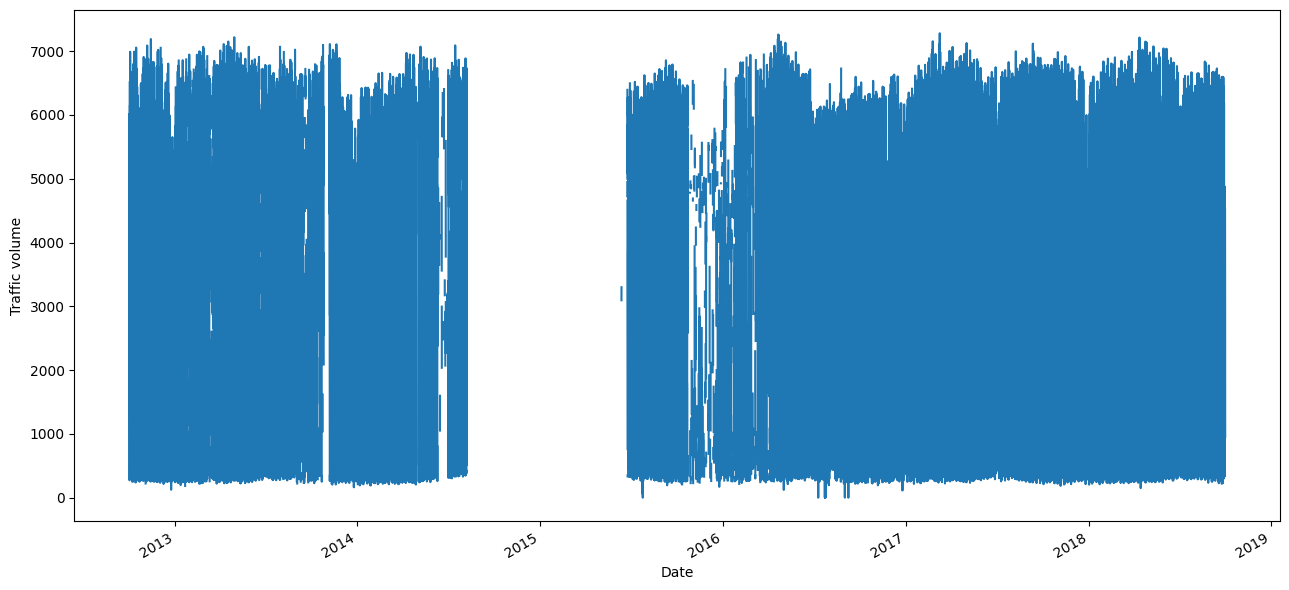

In [18]:
full_df = full_df.set_index('date_time')
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(full_df.traffic_volume)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic volume')

fig.autofmt_xdate()
plt.tight_layout()

Середній транспортний потік за годину для святкових та  робочих днів по всьому наборі даних

In [19]:
meanTraffic_holiday = df.groupby('holiday', as_index=False)['traffic_volume'].mean()

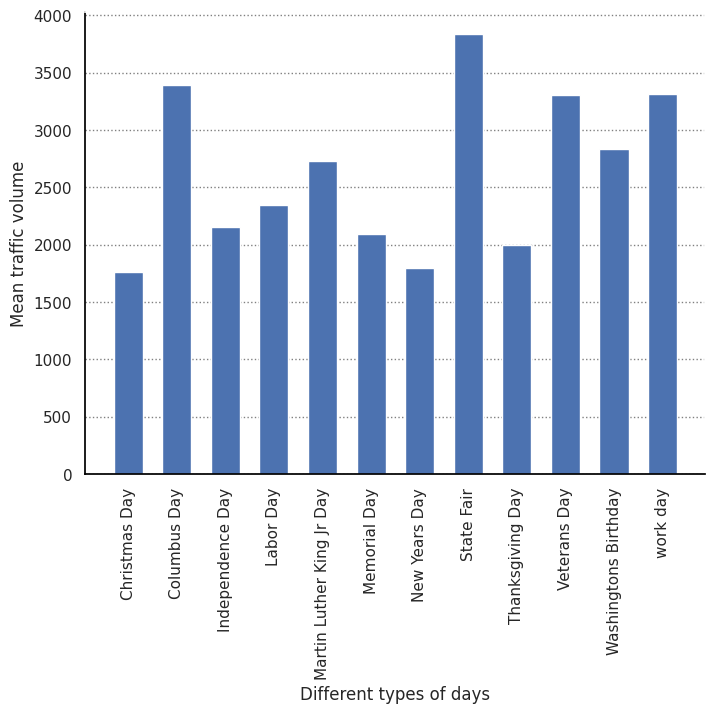

In [20]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set( xlabel='Different types of days', ylabel='Mean traffic volume')
plt.bar(meanTraffic_holiday['holiday'], meanTraffic_holiday['traffic_volume'], width=0.6)
plt.xticks(rotation=90)
ax.set_facecolor("white")
ax.grid(axis='y', linestyle=':', color='gray', alpha=1, zorder=0)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

Date_time як індекс

In [21]:
df = df.set_index('date_time')
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,,
2012-10-02 09:00:00,5545,work day,288.28,0.0,0.0,40,Clouds,scattered clouds
2012-10-02 10:00:00,4516,work day,289.36,0.0,0.0,75,Clouds,broken clouds
2012-10-02 11:00:00,4767,work day,289.58,0.0,0.0,90,Clouds,overcast clouds
2012-10-02 12:00:00,5026,work day,290.13,0.0,0.0,90,Clouds,overcast clouds
2012-10-02 13:00:00,4918,work day,291.14,0.0,0.0,75,Clouds,broken clouds


In [22]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_name()
df['day_of_year'] = df.index.dayofyear

Середній транспортний потік за годину для різних днів тижня
по всьому набору даних

In [23]:
meanTraffic_day_of_week = df.groupby('day_of_week', as_index=False)['traffic_volume'].mean().reindex([1, 5, 6, 4, 0, 2, 3])
meanTraffic_day_of_week

,day_of_week,traffic_volume
1,Monday,3313.560614
5,Tuesday,3534.717166
6,Wednesday,3608.276064
4,Thursday,3653.914611
0,Friday,3674.777608
2,Saturday,2822.564661
3,Sunday,2426.249484


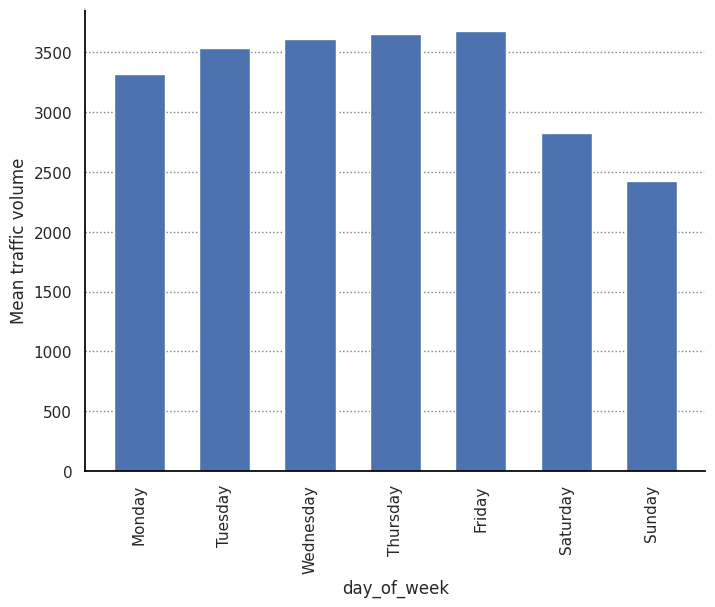

In [24]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set( xlabel='day_of_week', ylabel='Mean traffic volume')
plt.bar(meanTraffic_day_of_week['day_of_week'], meanTraffic_day_of_week['traffic_volume'], width=0.6)
plt.xticks(rotation=90)
ax.set_facecolor("white")
ax.grid(axis='y', linestyle=':', color='gray', alpha=1, zorder=0)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

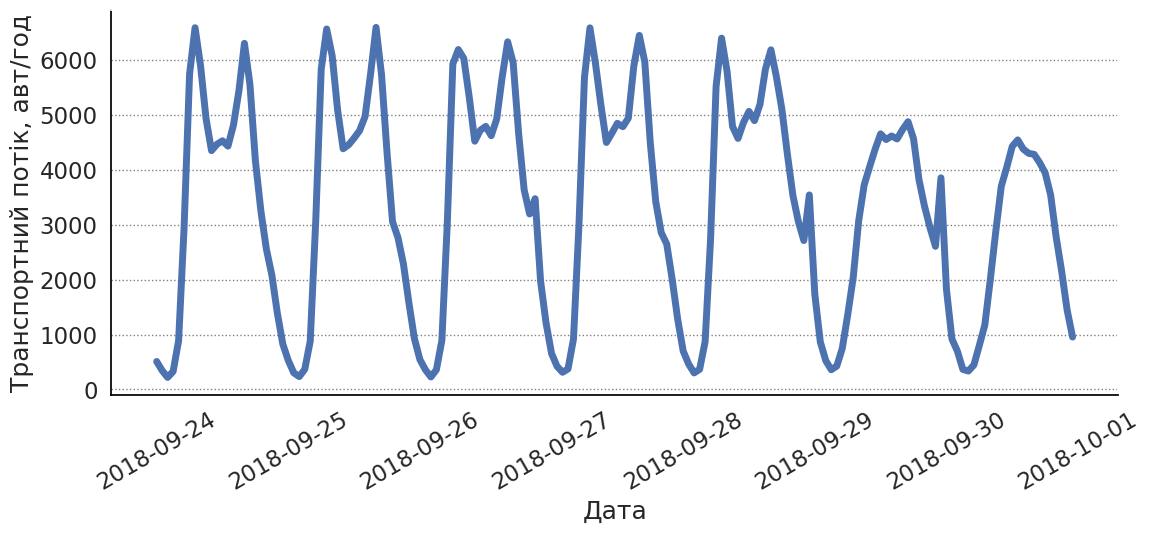

In [25]:
# Погодинний транспортний потік для останнього тижня
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(13, 5))
plt.plot(df['2018-09-24 ':].traffic_volume, linewidth=5)
#ax.set_yticks(np.arange(1000, 7000, 2000))

plt.xticks(rotation = 30)
plt.xlabel('Дата')
plt.ylabel('Транспортний потік, авт/год')
ax.set_facecolor("white")
ax.grid(axis='y', linestyle=':', color='gray', alpha=1, zorder=0)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

Транспортний потік для різних годин доби у будні і вихідні дні, усереднений по всьому набору даних

In [26]:
work_day = df[(df['day_of_week'] != 'Saturday') & (df['day_of_week'] != 'Sunday')]
hoursMean_work_day = work_day.groupby('hour', as_index=False)['traffic_volume'].mean()
weekend = df[(df['day_of_week'] == 'Saturday') | (df['day_of_week'] == 'Sunday')]
hoursMean = weekend.groupby('hour', as_index=False)['traffic_volume'].mean()

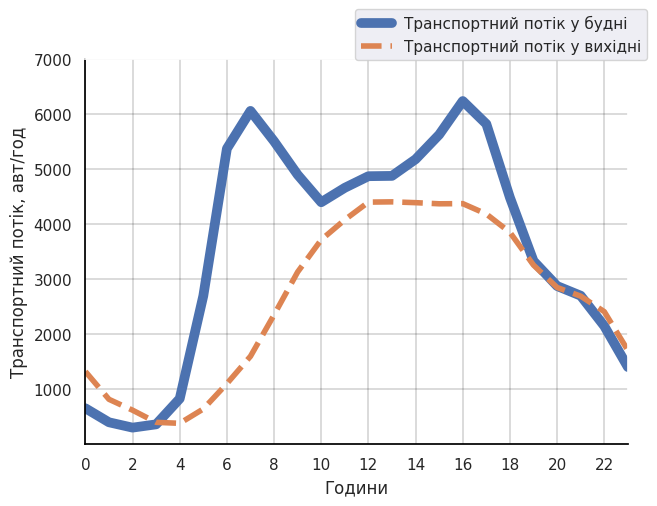

In [27]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(7, 5))
ax.set( xlabel='Години', ylabel='Транспортний потік, авт/год')#, title='Traffic trend in a day')
ax.set_ylim(1, 7000)
ax.set_xlim(0, 23)
plt.xticks(np.arange(0, 24, step=2))
plt.plot(hoursMean_work_day['traffic_volume'], linewidth=7)
plt.plot(hoursMean['traffic_volume'], linewidth=4, linestyle='--')
plt.legend(['Транспортний потік у будні', 'Транспортний потік у вихідні'], bbox_to_anchor=(1.05,1.15))

ax.set_facecolor("white")
plt.grid(color='black', linewidth=0.2)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

In [28]:
#df = df.drop('weather_description',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40575 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       40575 non-null  int64  
 1   holiday              40575 non-null  object 
 2   temp                 40575 non-null  float64
 3   rain_1h              40575 non-null  float64
 4   snow_1h              40575 non-null  float64
 5   clouds_all           40575 non-null  int64  
 6   weather_main         40575 non-null  object 
 7   weather_description  40575 non-null  object 
 8   hour                 40575 non-null  int32  
 9   day_of_week          40575 non-null  object 
 10  day_of_year          40575 non-null  int32  
dtypes: float64(3), int32(2), int64(2), object(4)
memory usage: 4.4+ MB


Приведемо всі стовпці до числових значень

In [29]:
categorical_cols = ['holiday', 'weather_main', 'weather_description', 'day_of_week']

In [30]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_cols])

In [31]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_cols))
one_hot_df.index = df.index

In [32]:
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_cols, axis=1)

In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40575 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 72 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   traffic_volume                                           40575 non-null  int64  
 1   temp                                                     40575 non-null  float64
 2   rain_1h                                                  40575 non-null  float64
 3   snow_1h                                                  40575 non-null  float64
 4   clouds_all                                               40575 non-null  int64  
 5   hour                                                     40575 non-null  int32  
 6   day_of_year                                              40575 non-null  int32  
 7   holiday_Christmas Day                                    40575 non-null  floa

Збережемо оброблений набір даних

In [169]:
df_encoded.to_csv('Metro_Interstate_Traffic_Volume-encoded.csv', sep=',')